In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as layers

In [2]:
# Predictive model to categorize 7 different types of Terrains
# Features are of color pixels in shape 3x3x4
# Data set provided by UC Irvine
# https://archive.ics.uci.edu/dataset/146/
# Srinivasan,Ashwin. (1993). Statlog (Landsat Satellite). UCI Machine Learning Repository. https://doi.org/10.24432/C55887.


# Terrain 6 (mixture class) was not included in data set, therefore only 6 different labels are used
classes = ['red soil',
           'cotton crop',
           'grey soil',
           'dark grey soil',
           'soil with vegetation stubble',
           'very damp grey soil'
          ]

data = pd.read_csv('sat.trn', delimiter=' ', header=None)
encode = pd.get_dummies(data[36])
data.pop(36)
encode.columns = classes

In [3]:
features = data.copy()
label = encode.copy()

In [4]:
# Despite being images, each neighbourhood consists were flattened, resulting in a dense layer instead of Convolutions
model = tf.keras.models.Sequential()
model.add(layers.Input(shape=(features.shape[1], )))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.0005), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [5]:
# Fitting the model
history = model.fit(x=features,
                    y=label,
                    epochs=500,
                    batch_size=32,
                    callbacks=tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                               patience=50
                    )
                   )

Epoch 1/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step - accuracy: 0.2907 - loss: 26.0604
Epoch 2/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.4792 - loss: 2.0814
Epoch 3/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.5602 - loss: 1.2618
Epoch 4/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.6214 - loss: 1.0484
Epoch 5/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.6559 - loss: 0.9291
Epoch 6/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.6916 - loss: 0.8538
Epoch 7/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.7109 - loss: 0.7751
Epoch 8/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.7130 - loss: 0.8116
Epoch 9/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.7307 - loss: 0.7231
Epoch 10/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.7339 - loss: 0.7177
Epoch 11/500
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.7443 - loss: 0.7117
Epoch 12/500
139/1

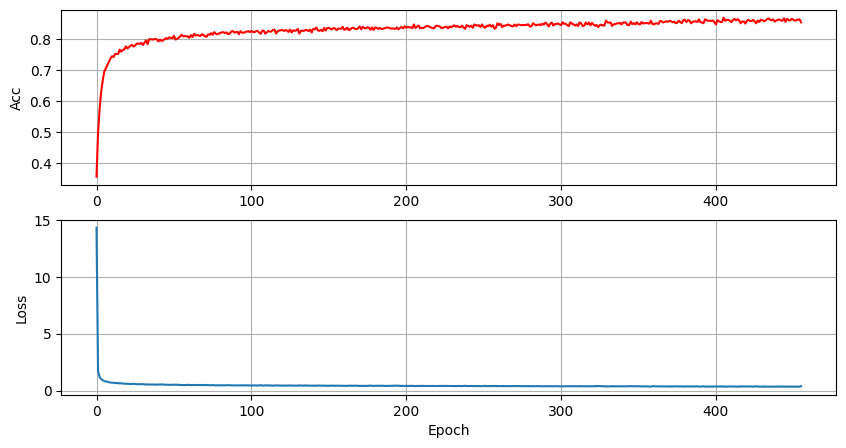

In [6]:
# History plotting
def plot_history(history):
    fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(10,5))
    ax[0].plot(history.history['accuracy'], color='red', label='Acc')
    ax[0].set_ylabel('Acc')
    ax[0].grid(True)
    ax[1].plot(history.history['loss'], label='loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].grid(True)
    

hist = pd.DataFrame(history.history)
plot_history(history)


In [7]:
# Reading the test data
feature_test = pd.read_csv('sat.tst', delimiter=' ', header=None)
label_test = pd.get_dummies(feature_test[36])
feature_test.pop(36)
label_test.columns = classes

In [8]:
# Prediction of the new data
# Model accuracy similar to the training data, fairly accuracte model
loss, acc = model.evaluate(feature_test, label_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.7819 - loss: 0.5243
